In [2]:
import pandas as pd

# Load the data from the CSV file
file_path = 'data/bquxjob_1722a7a9_18b4049a838.csv'
data = pd.read_csv(file_path)

# Show the first few rows of the dataframe
data.head()


,mode,reason,selection,rightSelection,prolificId,story,timestamp
0,task,al the three stories are realted to each other...,Linear,Arch,Naomi,story_Muddle_Puddle_Arch_seed928.json,2023-10-17 01:57:21.742000 UTC
1,task,The narrative follows one theme for two chapte...,LongFork,Arch,organgefetcher,story_Muddle_Puddle_Arch_seed928.json,2023-10-17 02:54:14.809000 UTC
2,task,"From the first chapter, the next two different...",WideBranch,Arch,Jayana,story_Muddle_Puddle_Arch_seed928.json,2023-10-17 01:54:41.332000 UTC
3,task,"From the first chapter, the next two different...",WideBranch,Arch,Jayana,story_Muddle_Puddle_Arch_seed928.json,2023-10-17 01:54:42.575000 UTC
4,task,Frist chapter: Economic growth\nSecond chapter...,Ladder,Ladder,organgefetcher,story_Muddle_Puddle_Ladder_seed241.json,2023-10-17 02:37:20.605000 UTC


In [4]:
# Convert the 'timestamp' column to datetime
data['timestamp'] = pd.to_datetime(data['timestamp'].str.replace(' UTC', ''))

# Group by 'prolificId' only and calculate the time difference between the minimum and maximum timestamps
total_time_spent = data.groupby('prolificId').agg(
    start_time=('timestamp', 'min'),
    end_time=('timestamp', 'max')
).reset_index()

total_time_spent['total_time_spent'] = total_time_spent['end_time'] - total_time_spent['start_time']

# We only need the 'prolificId' and 'total_time_spent' columns for our analysis
total_time_spent = total_time_spent[['prolificId', 'total_time_spent']]

# Add one column total time as minutes number float
total_time_spent['total_time_spent_minutes'] = total_time_spent['total_time_spent'].dt.total_seconds() / 60

total_time_spent


,prolificId,total_time_spent,total_time_spent_minutes
0,Jayana,0 days 00:33:15.099000,33.251650
1,Maggie,0 days 00:00:00.907000,0.015117
2,Naomi,0 days 00:23:54.747000,23.912450
3,mason,0 days 00:09:14.513000,9.241883
4,organgefetcher,0 days 00:48:02.342000,48.039033


In [3]:
# Determine if the selection was correct
data['correct'] = data['selection'] == data['rightSelection']

# Calculate the accuracy for each user
accuracy = data.groupby('prolificId')['correct'].agg(['sum', 'count']).reset_index()
accuracy['accuracy'] = accuracy['sum'] / accuracy['count'] * 100  # Calculate accuracy as a percentage

# We only need the 'prolificId' and 'accuracy' columns for our analysis
accuracy 


,prolificId,sum,count,accuracy
0,Jayana,4,10,40.000000
1,Maggie,0,2,0.000000
2,Naomi,5,11,45.454545
3,mason,4,10,40.000000
4,organgefetcher,4,15,26.666667


In [4]:
# Group the data by 'rightSelection' (narrative structure) and calculate accuracy
accuracy_by_narrative = data.groupby('rightSelection')['correct'].agg(['sum', 'count']).reset_index()
accuracy_by_narrative['accuracy'] = accuracy_by_narrative['sum'] / accuracy_by_narrative['count'] * 100

# We only need the 'rightSelection' (narrative structure) and 'accuracy' columns for our analysis
accuracy_by_narrative = accuracy_by_narrative[['rightSelection', 'accuracy']]

accuracy_by_narrative


,rightSelection,accuracy
0,Arch,0.000000
1,Ladder,18.181818
2,Linear,66.666667
3,LongFork,20.000000
4,SharpBranch,60.000000
5,SharpMerge,0.000000
6,ShortFork,60.000000
7,WideBranch,33.333333
8,WideMerge,75.000000


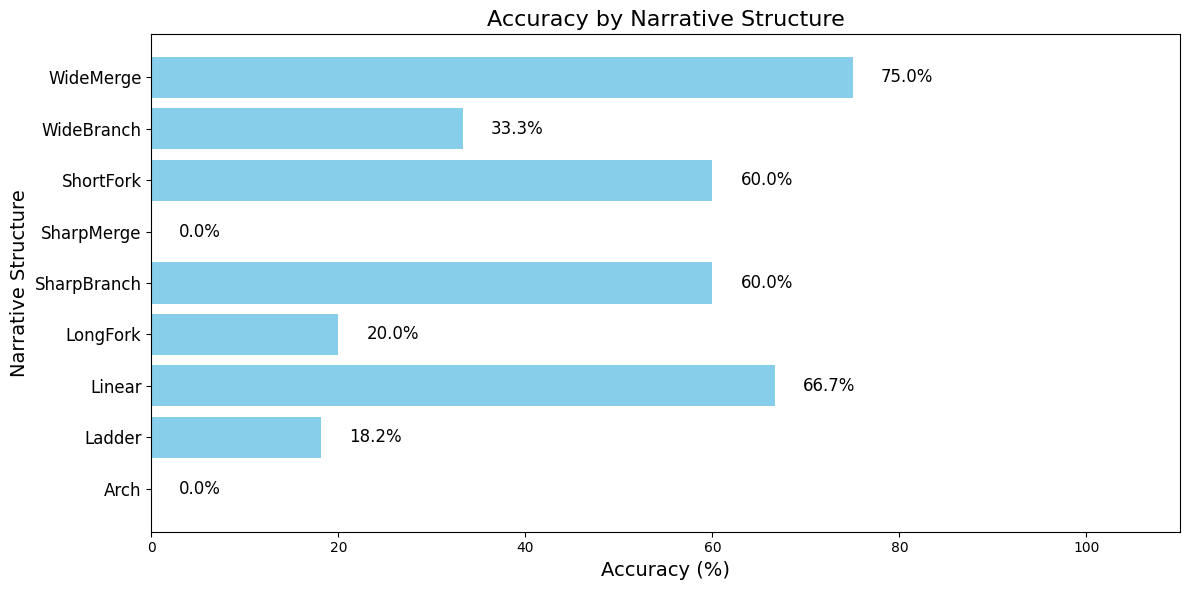

In [5]:
import matplotlib.pyplot as plt
# Corrected data to plot
narrative_structures = accuracy_by_narrative['rightSelection']
accuracy_values = accuracy_by_narrative['accuracy']

# Create horizontal bar chart
plt.figure(figsize=(12, 6))
plt.barh(narrative_structures, accuracy_values, color='skyblue')
plt.ylabel('Narrative Structure', fontsize=14)
plt.xlabel('Accuracy (%)', fontsize=14)
plt.title('Accuracy by Narrative Structure', fontsize=16)
plt.yticks(fontsize=12)
plt.xlim([0, 110])  # Setting the x-axis limit to show up to 110% for better visualization of 100% accuracy values

# Add text on right of each bar
for index, value in enumerate(accuracy_values):
    plt.text(value + 3, index, '{:.1f}%'.format(value), va='center', ha='left', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()
